In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

i. Load and plot time series data

In [ ]:
series = pd.read_csv("/content/Series B.csv")
series

,Date,Occurences
0,1/1/1959,55
1,1/2/1959,52
2,1/3/1959,50
3,1/4/1959,51
4,1/5/1959,64
...,...,...
360,12/27/1959,57
361,12/28/1959,72
362,12/29/1959,68
363,12/30/1959,75


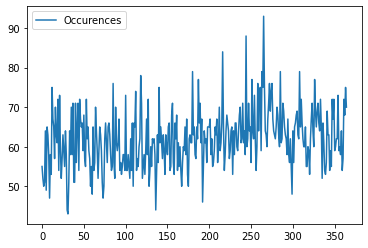

In [ ]:
series.plot()
pyplot.show()

ii.	Is the series stationary or non-stationary? 

[Infer by looking at the plot]  

From the plot of the data, we can infer that the given time series is stationary.

A time series is said to be non-stationary when the mean or variance keep changing with time. But in the plot that we have plotted, we can see that the mean is approximately constant and the fluctuations are around a point ~60. Since the mean doesn't change with time, this plot is stationary.

iii.	Split the time series into two contiguous sequences. Calculate the mean and variance of each group of numbers and compare the values. 

In [ ]:
X = series
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]

In [ ]:
print("Mean of 1st half:")
print(X1.Occurences.mean())
print("Mean of 2ndt half:")
print(X2.Occurences.mean())
print("Var of 1st half:")
print(X1.Occurences.var())
print("Var of 2nd half:")
print(X2.Occurences.var())

Mean of 1st half:
59.76373626373626
Mean of 2ndt half:
64.18579234972678
Var of 1st half:
49.485307510169385
Var of 2nd half:
48.976280550051044


Since the mean and variance for both the halves do not seem to vary a lot, we can conclude that the time series is stationary.

iv.	Log transform the given time series.

In [ ]:
from math import exp
from numpy import log
transform = log(series.Occurences)
transform

0      4.007333
1      3.951244
2      3.912023
3      3.931826
4      4.158883
         ...   
360    4.043051
361    4.276666
362    4.219508
363    4.317488
364    4.248495
Name: Occurences, Length: 365, dtype: float64

v.	Draw the histogram and line plot of log transformed time series 

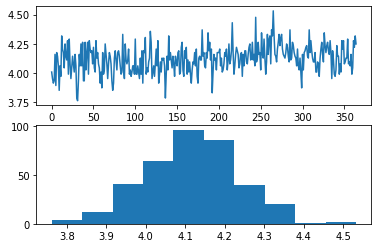

In [ ]:
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

vi.	Perform Augmented Dickey-Fuller test on the given time series and show the output of the Augmented Dickey-Fuller test. 

In [ ]:
# ADF Test
from statsmodels.tsa.stattools import adfuller
series = pd.read_csv("/content/Series B.csv", parse_dates=['Date'], index_col='Date')
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -4.808291253559763
n_lags: 5.243412990149865e-05
p-value: 5.243412990149865e-05
Critial Values:
   1%, -3.448748905151901
Critial Values:
   5%, -2.8696473721448728
Critial Values:
   10%, -2.5710891239349585


The p-value is obtained is greater than significance level of 0.05 and the ADF statistic is lower than any of the critical values.

So, we can reject the null hypothesis and take that the series is stationary.

vii.	The simplest forecast that we can make is to forecast that what happened in the previous time step will be the same as what will happen in the next time step. This is called the naive forecast or the persistence forecast model. Implement the persistence model by creating a lagged dataset of the given time series. 

In [ ]:
# Create lagged dataset
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

    t-1  t+1
0   NaN   55
1  55.0   52
2  52.0   50
3  50.0   51
4  51.0   64


viii.	Split into train and test sets with 70:30 ratios and implement the persistence model.  Calculate the residuals and show the Summary statistics of the residual errors 

In [ ]:
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.7)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [ ]:
import sklearn
import math
predictions = [x for x in test_X]
# skill of persistence model
rmse = math.sqrt(sklearn.metrics.mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)
print(residuals.head())

Test RMSE: 8.316
      0
0 -11.0
1  -8.0
2   6.0
3  16.0
4 -12.0


ix.	Create density plots and histogram plots of the residual errors 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


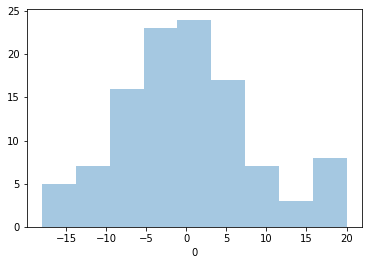

In [ ]:
import seaborn as sns
sns.distplot(a=residuals[0], kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


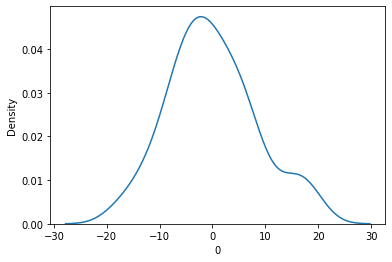

In [ ]:
sns.distplot(a=residuals[0], hist=False)

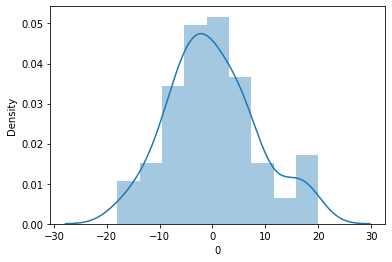

In [ ]:
sns.distplot(a=residuals[0])

x.	Create the Residual Q-Q Plot and Residual Autocorrelation Plot 

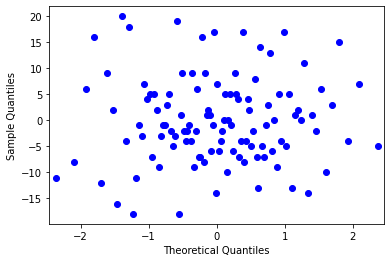

In [ ]:
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals)
pyplot.show()

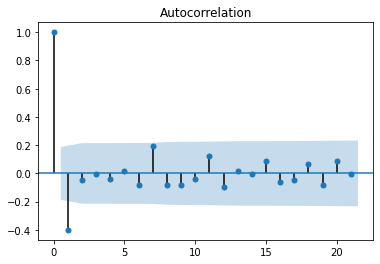

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals)
pyplot.show()